# Stoneburner, Kurt
- ## DSC 630 - Week XX

In [1]:
from datetime import datetime
import os
import sys
# //*** Imports and Load Data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import linear_model
from math import sqrt
from sklearn.metrics import mean_squared_error

#//*** Use the whole window in the IPYNB editor
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#//*** Maximize columns and rows displayed by pandas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# //*** Legends automatically generate too many labels based on my looping method.
# //*** Remove the Duplicate Legends. I wrote this for DSC 530 and it keeps on giving.
def deduplicate_legend(input_ax):
    # //**** Get handle and label list for the current legend
    # //**** Use first instance, toss the rest.
    handles, labels = input_ax.get_legend_handles_labels()

    handle_dict = {}

    for x in range(len(labels)):
        if labels[x] not in handle_dict.keys():
            # //*** Label = handle
            handle_dict[labels[x]] = handles[x]

    # //*** Build unique output ists and handles
    out_handles = []
    out_labels = []
    
    for label,handle in handle_dict.items():
        out_handles.append(handle)
        out_labels.append(label)
    
    return out_handles,out_labels

   

Marketing References:

https://thesportjournal.org/article/the-effects-of-promotions-on-attendance-in-professional-baseball/

https://sabr.org/journal/article/what-do-your-fans-want-attendance-correlations-with-performance-ticket-prices-and-payroll-factors/

https://engagedscholarship.csuohio.edu/cgi/viewcontent.cgi?article=1948&context=etdarchive


In [2]:
#//*** Read Raw CSV File
df = pd.read_csv("z_wk02_dodgers.csv")

df.head(5)

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


In [3]:
#//*** Read Raw CSV File
df = pd.read_csv("z_wk02_dodgers.csv")

#//*** Convert month day to date
#//*** iPython test to only run once
if 'month' in df.columns:
    
    #//*** Build an object to handle renaming
    rename_month = {
        'APR' : "April",
        'MAY' : "May",
        'JUN' : 'June',
        'JUL' : 'July',
        'AUG' : 'August',
        'SEP' : 'September',
        'OCT' : 'October',
    }

    #//*** Rename month based on rename_month
    for key,value in rename_month.items():
        df['month'] = df['month'].str.replace(key,value)

    #//*** Convert Day to String and add leading zero
    df['day'] = df['day'].astype(str).str.zfill(2)

    #//*** Build Date Object from Month and Day Columns
    date_list = []

    #//*** Loop through each row, build date value with strptime, and add value to list
    for row in df.iterrows():
        date_list.append(datetime.strptime(f"{row[1]['month']} {row[1]['day']} 2012","%B %d %Y"))

    #//*** Add Date Column based on list
    df['date'] = pd.Series(date_list)
    
    #//*** Reorder columns, Date First, Drop Month & Day
    df = df [['date','attend'] + list(df.columns[:2]) + list(df.columns[3:-1])]

df


,date,attend,month,day,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,2012-04-10,56000,April,10,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,2012-04-11,29729,April,11,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,2012-04-12,28328,April,12,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,2012-04-13,31601,April,13,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,2012-04-14,46549,April,14,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO
5,2012-04-15,38359,April,15,Sunday,Padres,65,Clear,Day,NO,NO,NO,NO
6,2012-04-23,26376,April,23,Monday,Braves,60,Cloudy,Night,NO,NO,NO,NO
7,2012-04-24,44014,April,24,Tuesday,Braves,63,Cloudy,Night,NO,NO,NO,NO
8,2012-04-25,26345,April,25,Wednesday,Braves,64,Cloudy,Night,NO,NO,NO,NO
9,2012-04-27,44807,April,27,Friday,Nationals,66,Clear,Night,NO,NO,YES,NO


In [4]:
#//*** Keep a copy of the original Dataframe before creating Integer Categoricals
df_cat = df.copy()

#//*** Convert Day of Week to Categorical Integer
day_of_week = {
    "Monday" : "1",
    "Tuesday" : "2",
    "Wednesday" : "3",
    "Thursday" : "4",
    "Friday" : "5",
    "Saturday" : "6",
    "Sunday" : "7"
}

#//*** Create Temp series
tds = pd.Series(df['day_of_week'].astype('str'))

#//*** Replace day_of week values with Integers
for key,value in day_of_week.items():
    tds = tds.str.replace(key,value)

#//*** tds to day_of_week
df_cat['day_of_week'] = tds.astype('int')

df_cat
#//*** Convert remaining columns to integer Categoricals
convert_cols = ["month","day","opponent","skies","day_night","cap","shirt","fireworks","bobblehead"]

#//*** Dictionary to hold Categorical definitions
df_dict = {}

#//*** Convert each column into a unique integer
#//*** 1.) Get Column unique Values
#//*** 2.) Enumerate creates a Tuple containing an incremental integer and the unique value
#//*** 3.) Convert Enumerated values into a dictionary
#//*** 4.) Add the Dictionary to df_dict using the col as key
for col in convert_cols:
    df_dict[col] = dict(enumerate(df_cat[col].unique()))
    
#//*** Loop through df_dict and replace values with integer keys

for col, value_dict in df_dict.items():
    print(value_dict)
    for key,value in value_dict.items():
        
        df_cat[col] = df_cat[col].str.replace(value,str(key))
    df_cat[col] = df_cat[col].astype(int)
df_cat

{0: 'April', 1: 'May', 2: 'June', 3: 'July', 4: 'August', 5: 'September', 6: 'October'}
{0: '10', 1: '11', 2: '12', 3: '13', 4: '14', 5: '15', 6: '23', 7: '24', 8: '25', 9: '27', 10: '28', 11: '29', 12: '07', 13: '08', 14: '09', 15: '18', 16: '19', 17: '20', 18: '26', 19: '30', 20: '31', 21: '16', 22: '17', 23: '01', 24: '02', 25: '03', 26: '04', 27: '05', 28: '06', 29: '21', 30: '22'}
{0: 'Pirates', 1: 'Padres', 2: 'Braves', 3: 'Nationals', 4: 'Giants', 5: 'Rockies', 6: 'Snakes', 7: 'Cardinals', 8: 'Astros', 9: 'Brewers', 10: 'Angels', 11: 'White Sox', 12: 'Mets', 13: 'Reds', 14: 'Phillies', 15: 'Cubs', 16: 'Marlins'}
{0: 'Clear ', 1: 'Cloudy'}
{0: 'Day', 1: 'Night'}
{0: 'NO', 1: 'YES'}
{0: 'NO', 1: 'YES'}
{0: 'NO', 1: 'YES'}
{0: 'NO', 1: 'YES'}


,date,attend,month,day,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,2012-04-10,56000,0,0,2,0,67,0,0,0,0,0,0
1,2012-04-11,29729,0,1,3,0,58,1,1,0,0,0,0
2,2012-04-12,28328,0,2,4,0,57,1,1,0,0,0,0
3,2012-04-13,31601,0,3,5,1,54,1,1,0,0,1,0
4,2012-04-14,46549,0,4,6,1,57,1,1,0,0,0,0
5,2012-04-15,38359,0,5,7,1,65,0,0,0,0,0,0
6,2012-04-23,26376,0,6,1,2,60,1,1,0,0,0,0
7,2012-04-24,44014,0,7,2,2,63,1,1,0,0,0,0
8,2012-04-25,26345,0,8,3,2,64,1,1,0,0,0,0
9,2012-04-27,44807,0,9,5,3,66,0,1,0,0,1,0


In [17]:
df['day_order'] = df_cat['day_of_week']
df['cap'] = df_cat['cap']
df['shirt'] = df_cat['shirt']
df['fireworks'] = df_cat['fireworks']
df['bobblehead'] = df_cat['bobblehead']
df['opponent_cat'] = df_cat['opponent']
df = df.sort_values('day_order')
print(df)

         date  attend      month day day_of_week   opponent  temp   skies  \
40 2012-07-02   34493       July  02      Monday       Reds    70  Clear    
26 2012-05-28   38016        May  28      Monday    Brewers    73  Clear    
6  2012-04-23   26376      April  23      Monday     Braves    60  Cloudy   
78 2012-10-01   33624    October  01      Monday     Giants    86  Clear    
58 2012-08-20   36878     August  20      Monday     Giants    80  Clear    
49 2012-07-30   33180       July  30      Monday     Snakes    73  Clear    
68 2012-09-03   33540  September  03      Monday     Padres    84  Cloudy   
12 2012-05-07   43713        May  07      Monday     Giants    67  Clear    
46 2012-07-16   32238       July  16      Monday   Phillies    67  Clear    
30 2012-06-11   50559       June  11      Monday     Angels    68  Clear    
18 2012-05-14   24312        May  14      Monday     Snakes    67  Clear    
55 2012-08-06   32659     August  06      Monday    Rockies    79  Clear    

In [6]:
print(df_dict)
df_cat.corr()

{'month': {0: 'April', 1: 'May', 2: 'June', 3: 'July', 4: 'August', 5: 'September', 6: 'October'}, 'day': {0: '10', 1: '11', 2: '12', 3: '13', 4: '14', 5: '15', 6: '23', 7: '24', 8: '25', 9: '27', 10: '28', 11: '29', 12: '07', 13: '08', 14: '09', 15: '18', 16: '19', 17: '20', 18: '26', 19: '30', 20: '31', 21: '16', 22: '17', 23: '01', 24: '02', 25: '03', 26: '04', 27: '05', 28: '06', 29: '21', 30: '22'}, 'opponent': {0: 'Pirates', 1: 'Padres', 2: 'Braves', 3: 'Nationals', 4: 'Giants', 5: 'Rockies', 6: 'Snakes', 7: 'Cardinals', 8: 'Astros', 9: 'Brewers', 10: 'Angels', 11: 'White Sox', 12: 'Mets', 13: 'Reds', 14: 'Phillies', 15: 'Cubs', 16: 'Marlins'}, 'skies': {0: 'Clear ', 1: 'Cloudy'}, 'day_night': {0: 'Day', 1: 'Night'}, 'cap': {0: 'NO', 1: 'YES'}, 'shirt': {0: 'NO', 1: 'YES'}, 'fireworks': {0: 'NO', 1: 'YES'}, 'bobblehead': {0: 'NO', 1: 'YES'}}


,attend,month,day,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
attend,1.000000,0.049306,0.015967,0.125134,0.153486,0.098951,-0.150963,-0.043544,-0.055002,0.133269,0.002094,0.581895
month,0.049306,1.000000,0.480211,-0.027308,0.187526,0.806647,-0.132903,-0.001950,0.079739,-0.028081,-0.023376,-0.030223
day,0.015967,0.480211,1.000000,-0.066298,0.294453,0.399236,-0.147001,-0.039270,0.180215,-0.047118,-0.211804,-0.074213
day_of_week,0.125134,-0.027308,-0.066298,1.000000,0.123136,0.115349,-0.124607,-0.460154,0.034306,-0.067192,0.176673,-0.095582
opponent,0.153486,0.187526,0.294453,0.123136,1.000000,0.084669,-0.234023,-0.054268,0.256661,-0.095287,0.105883,-0.008905
temp,0.098951,0.806647,0.399236,0.115349,0.084669,1.000000,-0.316584,-0.272141,0.064521,0.004394,-0.189899,0.049573
skies,-0.150963,-0.132903,-0.147001,-0.124607,-0.234023,-0.316584,1.000000,0.188903,0.099671,-0.108566,-0.021880,-0.049349
day_night,-0.043544,-0.001950,-0.039270,-0.460154,-0.054268,-0.272141,0.188903,1.000000,-0.128951,-0.074796,0.217922,0.188982
cap,-0.055002,0.079739,0.180215,0.034306,0.256661,0.064521,0.099671,-0.128951,1.000000,-0.031204,-0.072732,-0.063074
shirt,0.133269,-0.028081,-0.047118,-0.067192,-0.095287,0.004394,-0.108566,-0.074796,-0.031204,1.000000,-0.089648,-0.077743


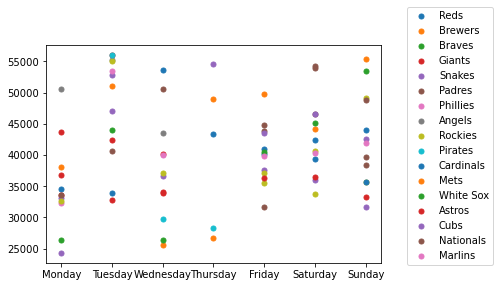

In [25]:
display_size = 40

fig,ax = plt.subplots()
field = 'opponent'
for loop_val in df[field].unique():
    ax.scatter(df[df[field]==loop_val]['day_of_week'],df[df[field]==loop_val]['attend'],label=loop_val,s=25)

    plt.legend(loc='upper right',bbox_to_anchor=(1.35, 1.2))
plt.show()
    

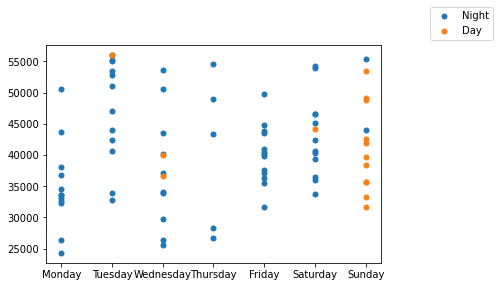

In [26]:
display_size = 40

fig,ax = plt.subplots()
field = 'day_night'
for loop_val in df[field].unique():
    ax.scatter(df[df[field]==loop_val]['day_of_week'],df[df[field]==loop_val]['attend'],label=loop_val,s=25)

    plt.legend(loc='upper right',bbox_to_anchor=(1.35, 1.2))
plt.show()
    

In [ ]:
display_size = 40

print(df_cat[df_cat['shirt']==1]['attend'])


fig,ax = plt.subplots()

marker_style = dict(linestyle=':', marker='o',markersize=15, markerfacecoloralt='tab:red')

ax.scatter(df['day_of_week'],df['attend'],s=25,label='No Promotion', color='black', marker='o')
ax.scatter(df[df['shirt']==1]['day_of_week'],df[df['shirt']==1]['attend'],label='shirt',s=75)
ax.scatter(df[df['cap']==1]['day_of_week'],df[df['cap']==1]['attend'],label='cap',s=75)
ax.scatter(df[df['fireworks']==1]['day_of_week'],df[df['fireworks']==1]['attend'],label='fireworks',s=75)
ax.scatter(df[df['bobblehead']==1]['day_of_week'],df[df['bobblehead']==1]['attend'],label='bobblehead',s=75)
plt.legend(loc='upper right',bbox_to_anchor=(1.35, 1.025))
plt.show()
    
    

month


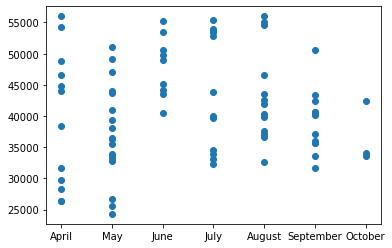

day


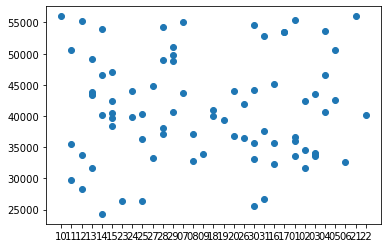

day_of_week


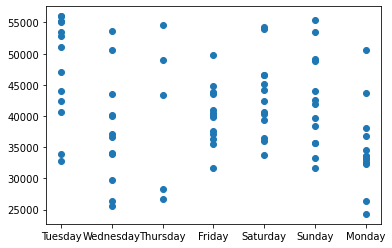

opponent


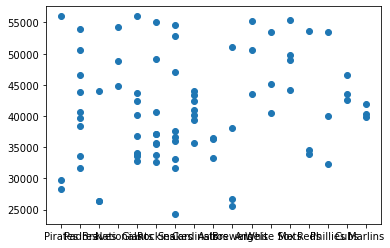

temp


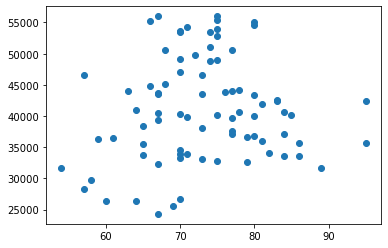

skies


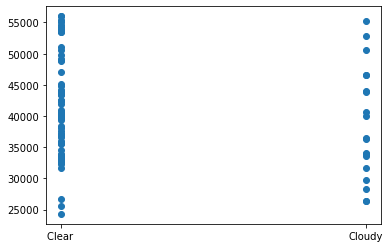

day_night


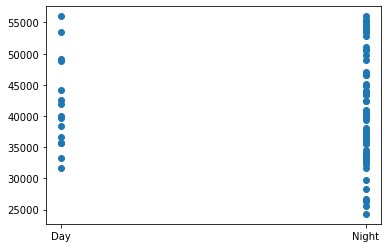

cap


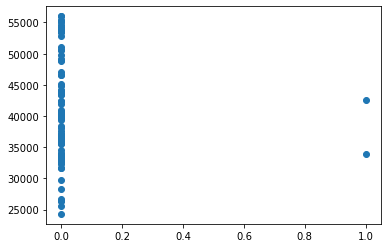

shirt


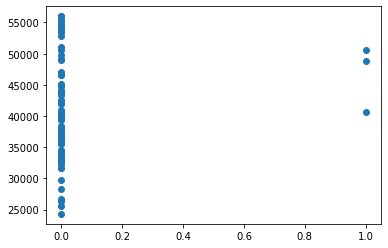

fireworks


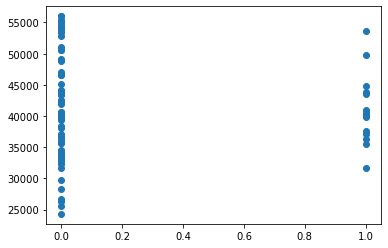

bobblehead


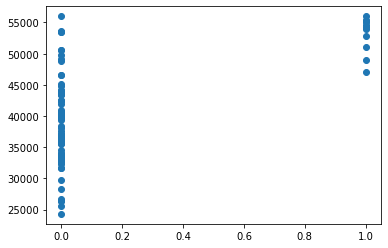

In [8]:
display_size = 40


#//*** Scatter plot all columns with attendance
for col in df_cat.columns[2:]:
    print(col)
    fig,ax = plt.subplots()
    ax.scatter(df[col],df['attend'],label=col)
    
    plt.show()
    
    

attend


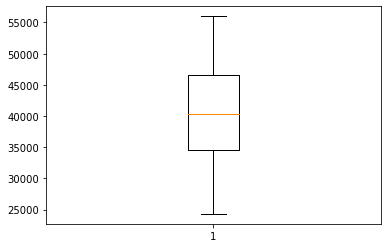

month


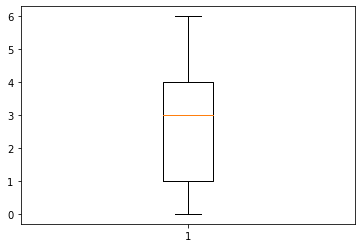

day


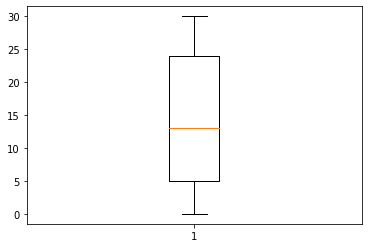

day_of_week


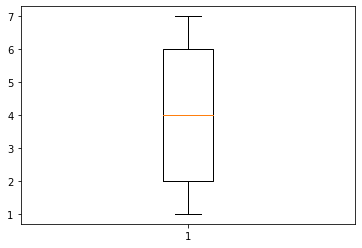

opponent


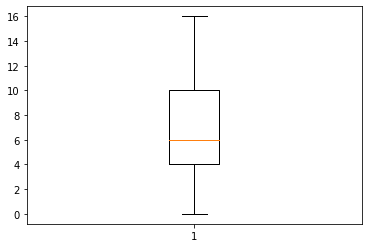

temp


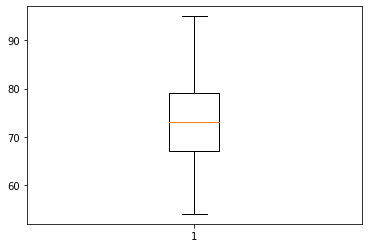

skies


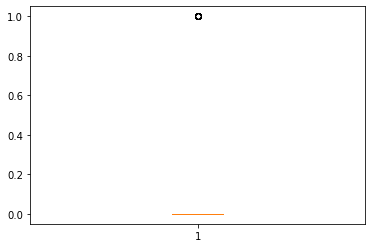

day_night


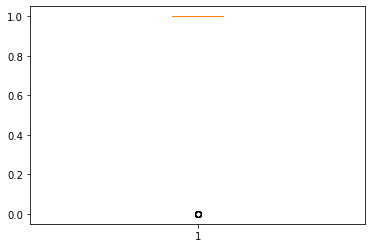

cap


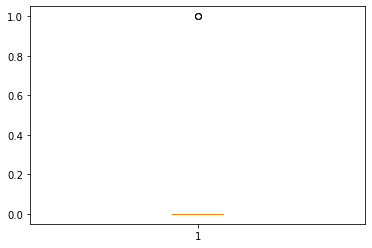

shirt


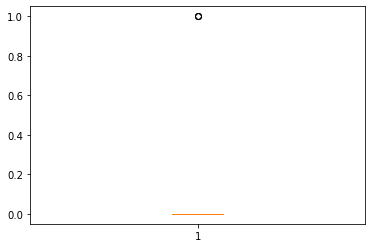

fireworks


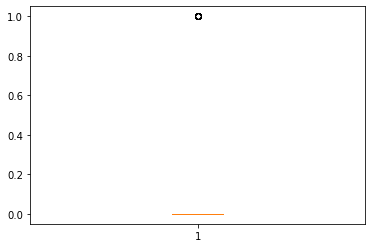

bobblehead


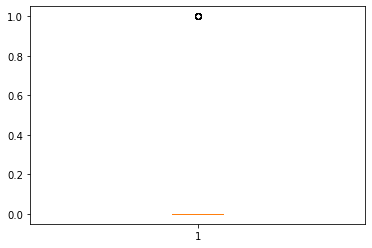

In [9]:
#//*** Scatter plot all columns with attendance
for col in df_cat.columns[1:]:
    print(col)
    fig,ax = plt.subplots()
    ax.boxplot(df_cat[col])
    
    plt.show()
    

In [10]:
from sklearn import linear_model
from math import sqrt
from sklearn.metrics import mean_squared_error

#race_columns = (pop_attrib_df[['county',race]].sort_values(race,ascending=False)['county'])

#print(model_df[race_columns])
#//*** Build the X attributes using the x_column. These are separated for readability and modularity
x_model = np.array(df_cat['bobblehead']).reshape(1, -1)

#print(x_model)
#//*** Build the independent variable using the Index Column defined above as y_col_index.
#y_column = model_df.columns[y_col_index]

#//*** Build the Y model using the y_column attribute. This is less readable and intuitive, but it lets the columns be 
#//*** easily assigned at the top of this section
y_model = np.array(df_cat['attend']).reshape(1, -1)

#//*** Define the Linear Model
regr = linear_model.LinearRegression(n_jobs=-1)

#//*** Make Regression Magic
regr.fit(x_model, y_model)

LinearRegression(n_jobs=-1)

NameError: name 'ca_100k_df' is not defined

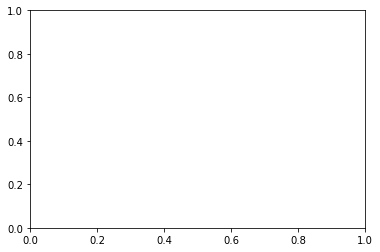

In [11]:
#//*** Check our Work.
#//*** Cases per 100k should be relatively similar in values.
display_size = 40
fig,ax = plt.subplots()

for county in ca_100k_df['county'].unique():
    
    loop_df = ca_100k_df[ca_100k_df['county'] ==  county]
    ax.plot(loop_df['date'],loop_df['cases'].rolling(5).mean(),label=county)


    plt.xticks(rotation=30,fontsize=display_size)
    plt.yticks(fontsize=display_size)
handles,labels = deduplicate_legend(ax)
plt.legend(fontsize=display_size*.25,loc='upper left')
plt.title(f"Scaled County Data (per 100k)",fontsize=display_size)
#plt.ylabel("Total Cases by County (millions)",fontsize=display_size)
plt.show()